In [1]:
import pandas as pd
import numpy as np
from glob2 import glob
from sklearn.decomposition import PCA
from scipy.linalg import norm 
import plotly_express as px
import seaborn as sns
sns.set(style = 'ticks')
%matplotlib inline
import os 
os.chdir('/Users/gracelyons/Desktop/MSDS/Capstone/')

## similarity

In [72]:
tfidf = pd.read_csv('output files/TFIDF.csv').set_index('speaker_id')

In [4]:
survey = pd.read_excel('survey_data.xlsx', usecols = ['studyid', 'assignment']).rename(columns = {'studyid': 'speaker_id', 'assignment': 'mindfulness'})

In [73]:
tfidf = tfidf.reset_index().merge(survey).set_index(['speaker_id']).drop('mindfulness', axis = 1)
tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553
speaker_id,,,,,,,,,,,,,,,,,,,,,
201,0.0,0.0,0.0,0.000038,0.0,0.0,0.0,0.0,0.000293,0.0,...,0.0,0.000162,0.0,0.000612,0.002148,0.001936,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.000029,0.0,0.0,0.0,0.0,0.000075,0.0,...,0.0,0.000109,0.0,0.000374,0.000000,0.000000,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.0,0.000149,0.0,...,0.0,0.000139,0.0,0.000841,0.000000,0.000000,0.0,0.0,0.0,0.0
204,0.0,0.0,0.0,0.000055,0.0,0.0,0.0,0.0,0.000283,0.0,...,0.0,0.000267,0.0,0.001062,0.000000,0.000000,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.000043,0.0,0.0,0.0,0.0,0.000221,0.0,...,0.0,0.000224,0.0,0.000663,0.000000,0.000000,0.0,0.0,0.0,0.0


In [38]:
lib = pd.read_csv('output files/LIB.csv').set_index('speaker_id')

In [39]:
lib.head()

,book_file
speaker_id,
201,201_1.24.20_S_SC.txt
202,202_1.30.20_S_SC.txt
203,203_1.30.20_S_SC.txt
204,204_1.30.20_S_SC.txt
205,205_1.30.20_S_SC.txt


#### clusters

In [40]:
l0 = tfidf.astype('bool').astype('int')
l1 = tfidf.apply(lambda x: x / x.sum(), 1)
l2 = tfidf.apply(lambda x: x/ norm(x), 1)

In [41]:
pairs = pd.DataFrame(index = pd.MultiIndex.from_product([tfidf.index.tolist(), tfidf.index.tolist()])).reset_index()

In [42]:
pairs = pairs[pairs.level_0 < pairs.level_1].set_index(['level_0', 'level_1'])
pairs.index.names = ['speaker_a', 'speaker_b']

In [43]:
pairs.head()

Empty DataFrame
Columns: []
Index: [(201, 202), (201, 203), (201, 204), (201, 205), (201, 206)]

In [44]:
pairs.shape

(3916, 0)

In [45]:
from scipy.spatial.distance import pdist
pairs['cityblock'] = pdist(tfidf, 'cityblock')
pairs['euclidean'] = pdist(tfidf, 'euclidean')
pairs['cosine'] = pdist(tfidf, 'cosine')
pairs['jaccard'] = pdist(l0, 'jaccard')
pairs['dice'] = pdist(l0, 'dice')
pairs['js'] = pdist(l1, 'jensenshannon')
pairs['euclidean2'] = pdist(l2, 'euclidean')
pairs['js2'] = pdist(tfidf, 'jensenshannon')
pairs.head()

cityblock  euclidean    cosine   jaccard      dice  \
speaker_a speaker_b                                                       
201       202         0.374560   0.041082  0.822055  0.582329  0.410765   
          203         0.453136   0.047461  0.916572  0.637681  0.468085   
          204         0.399325   0.041285  0.861747  0.643411  0.474286   
          205         0.424386   0.042694  0.896941  0.633700  0.463807   
          206         0.484134   0.044364  0.918590  0.697368  0.535354   

                           js  euclidean2       js2  
speaker_a speaker_b                                  
201       202        0.684895    1.282229  0.684895  
          203        0.726719    1.353937  0.726719  
          204        0.711099    1.312819  0.711099  
          205        0.721119    1.339359  0.721119  
          206        0.748621    1.355426  0.748621

In [46]:
pairs.to_csv('output files/pairs.csv')

In [48]:
ho_lookup = pd.read_csv('holdout_samples_lookup.csv')

In [50]:
ho_lookup.head()

,studyid,mindfulness,300s,holdout
0,349,1,1,0
1,314,1,1,0
2,223,1,0,0
3,207,0,0,0
4,333,0,1,0


In [74]:
tfidf = tfidf.reset_index()
tfidf = tfidf.merge(ho_lookup, how = 'left', left_on = 'speaker_id', right_on = 'studyid') \
    .drop(['studyid', '300s'], axis = 1)
tfidf['label'] = tfidf.apply(lambda x: "{}-{}".format(int(x.speaker_id), int(x.mindfulness)), 1)
tfidf.head()

,speaker_id,0,1,2,3,4,5,6,7,8,...,1547,1548,1549,1550,1551,1552,1553,mindfulness,holdout,label
0,201,0.0,0.0,0.0,0.000038,0.0,0.0,0.0,0.0,0.000293,...,0.000612,0.002148,0.001936,0.0,0.0,0.0,0.0,1,0,201-1
1,202,0.0,0.0,0.0,0.000029,0.0,0.0,0.0,0.0,0.000075,...,0.000374,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,202-0
2,203,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.0,0.000149,...,0.000841,0.000000,0.000000,0.0,0.0,0.0,0.0,1,1,203-1
3,204,0.0,0.0,0.0,0.000055,0.0,0.0,0.0,0.0,0.000283,...,0.001062,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,204-0
4,205,0.0,0.0,0.0,0.000043,0.0,0.0,0.0,0.0,0.000221,...,0.000663,0.000000,0.000000,0.0,0.0,0.0,0.0,1,0,205-1


In [75]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
def hca(sims, linkage_method='ward', color_thresh=.3, figsize=(10, 25)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = tfidf.label.values
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 432x288 with 0 Axes>

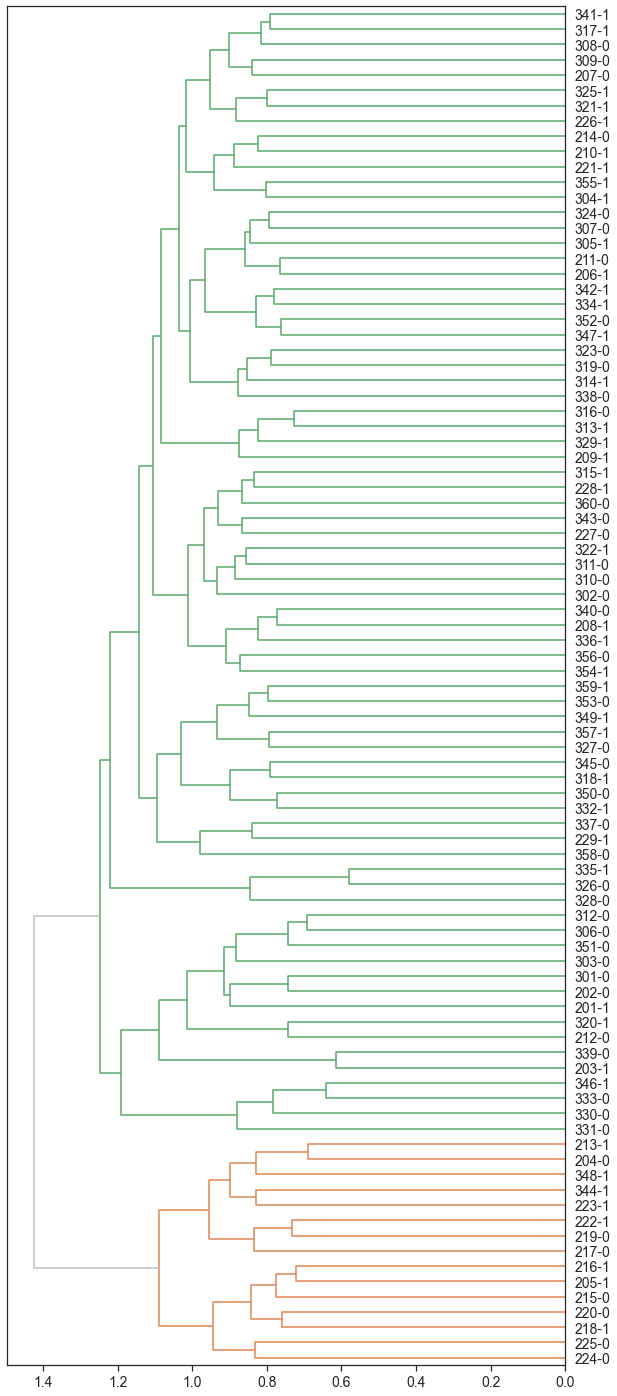

In [76]:
hca(pairs.cosine, color_thresh = 1.3)

<Figure size 432x288 with 0 Axes>

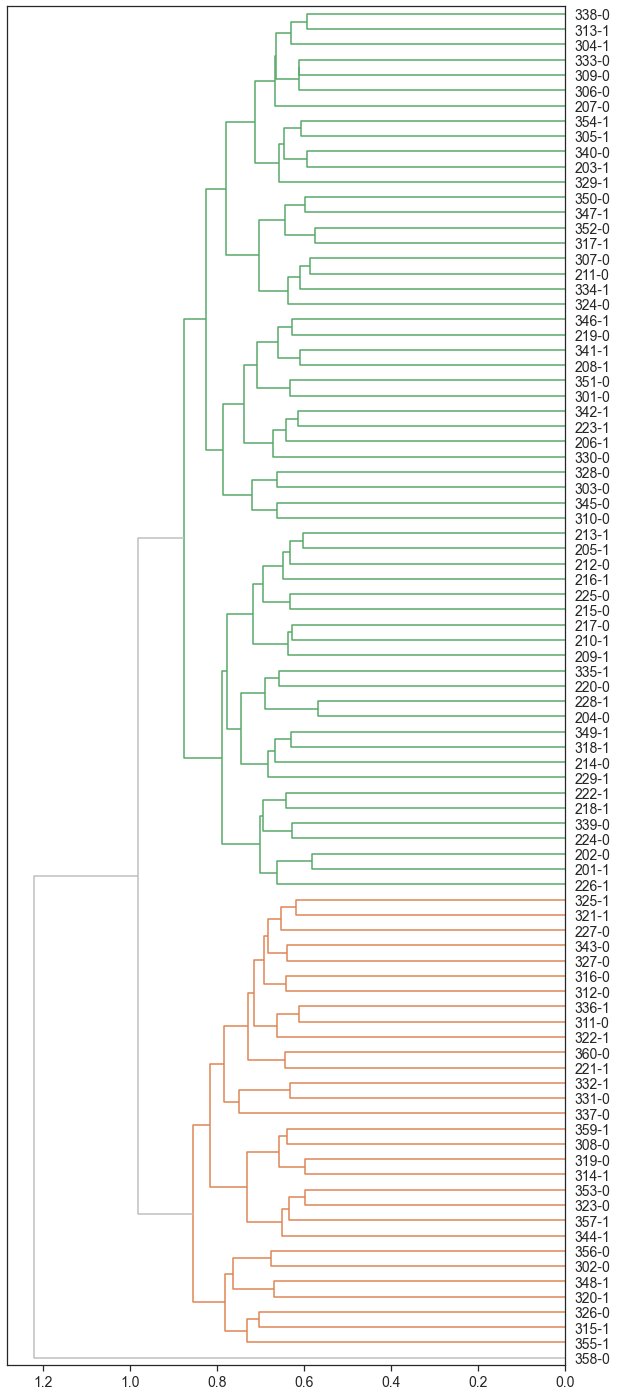

In [77]:
hca(pairs.jaccard, color_thresh = 0.9)

<Figure size 432x288 with 0 Axes>

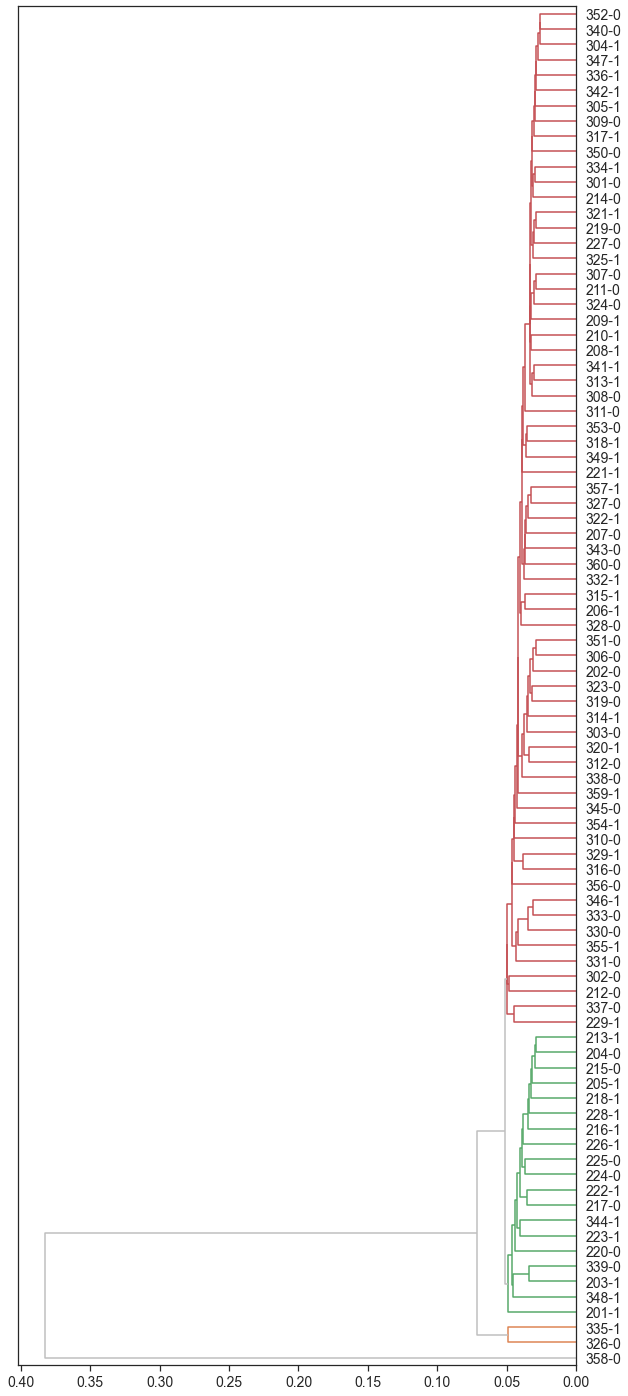

In [78]:
hca(pairs.euclidean, color_thresh = .05)

<Figure size 432x288 with 0 Axes>

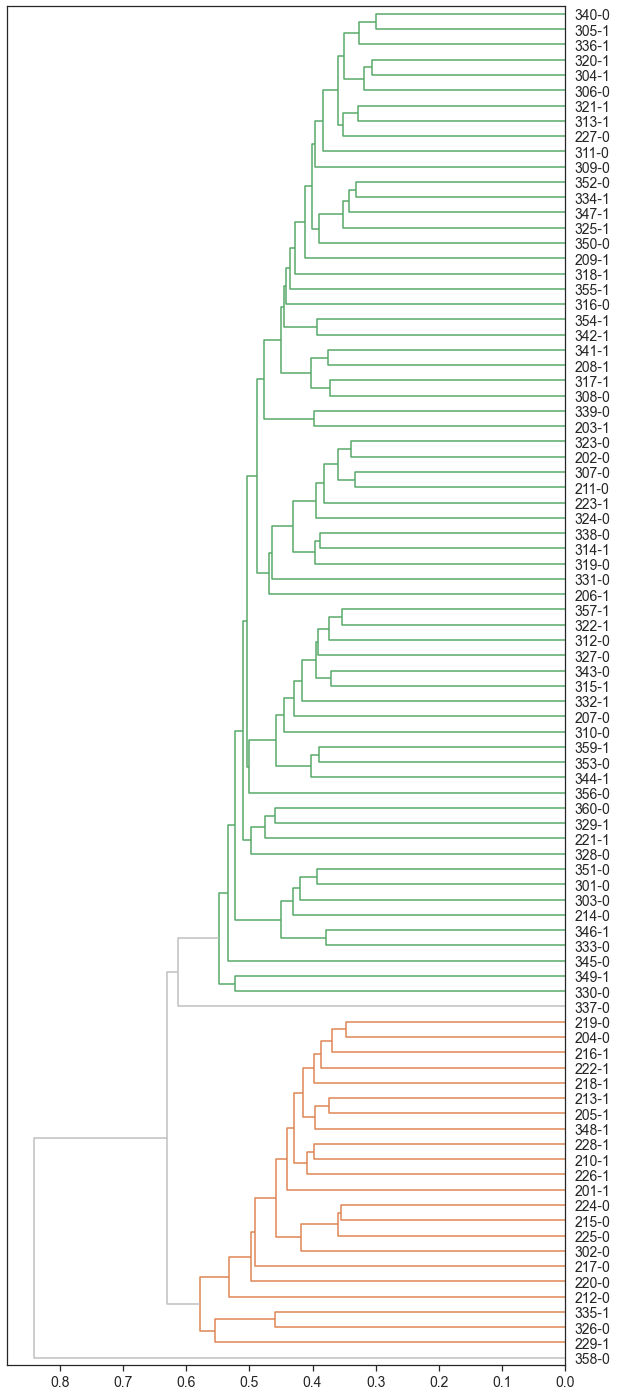

In [79]:
hca(pairs.cityblock, color_thresh = 0.6)

<Figure size 432x288 with 0 Axes>

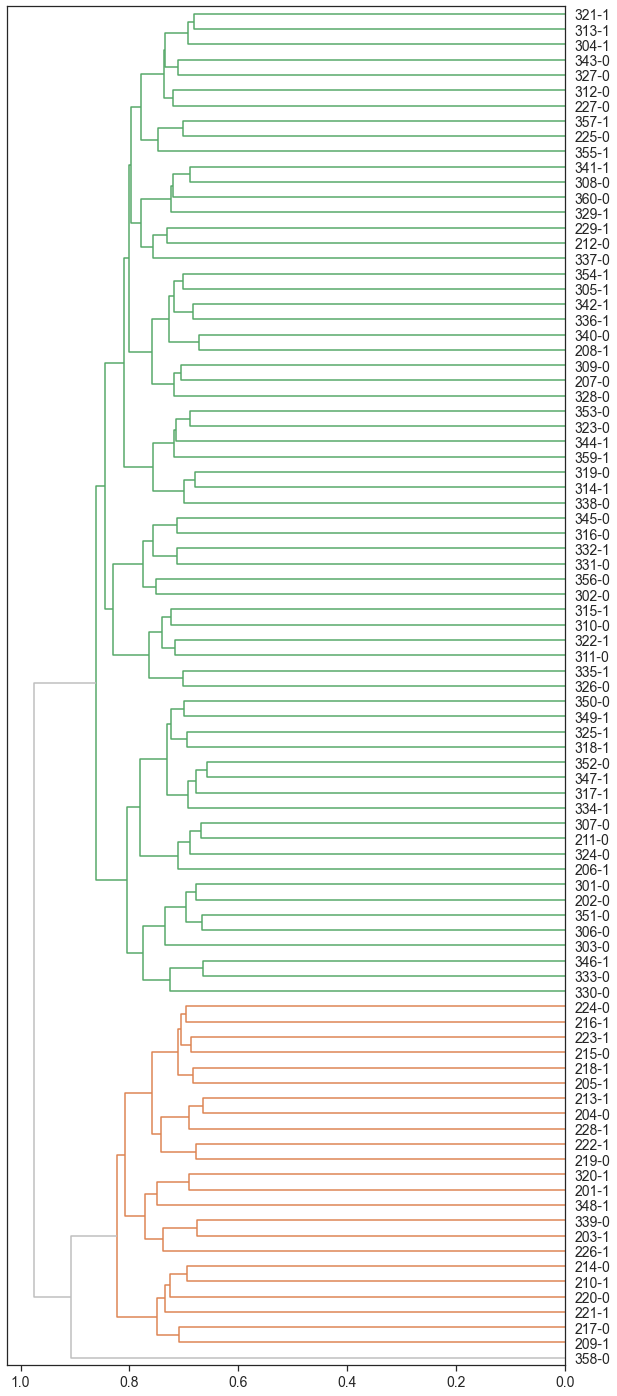

In [80]:
hca(pairs.js, color_thresh = 0.9)

<Figure size 432x288 with 0 Axes>

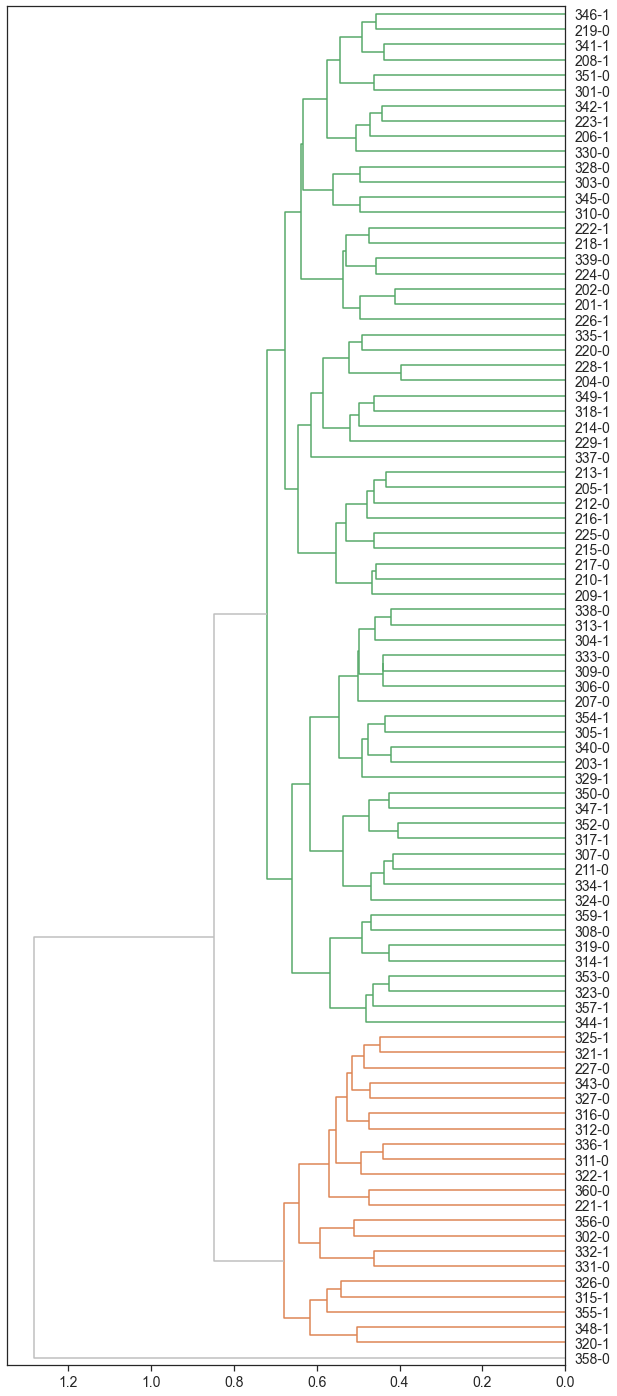

In [81]:
hca(pairs.dice, color_thresh = .8)

<Figure size 432x288 with 0 Axes>

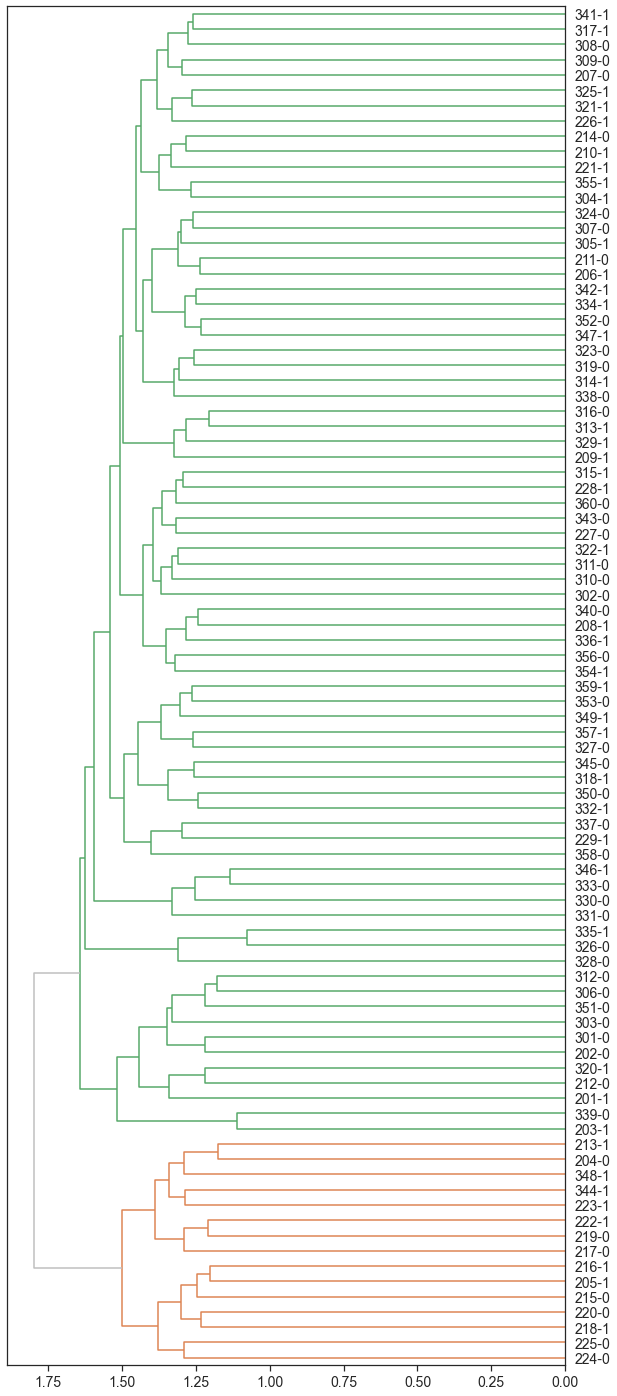

In [82]:
hca(pairs.euclidean2, color_thresh = 1.7)

<Figure size 432x288 with 0 Axes>

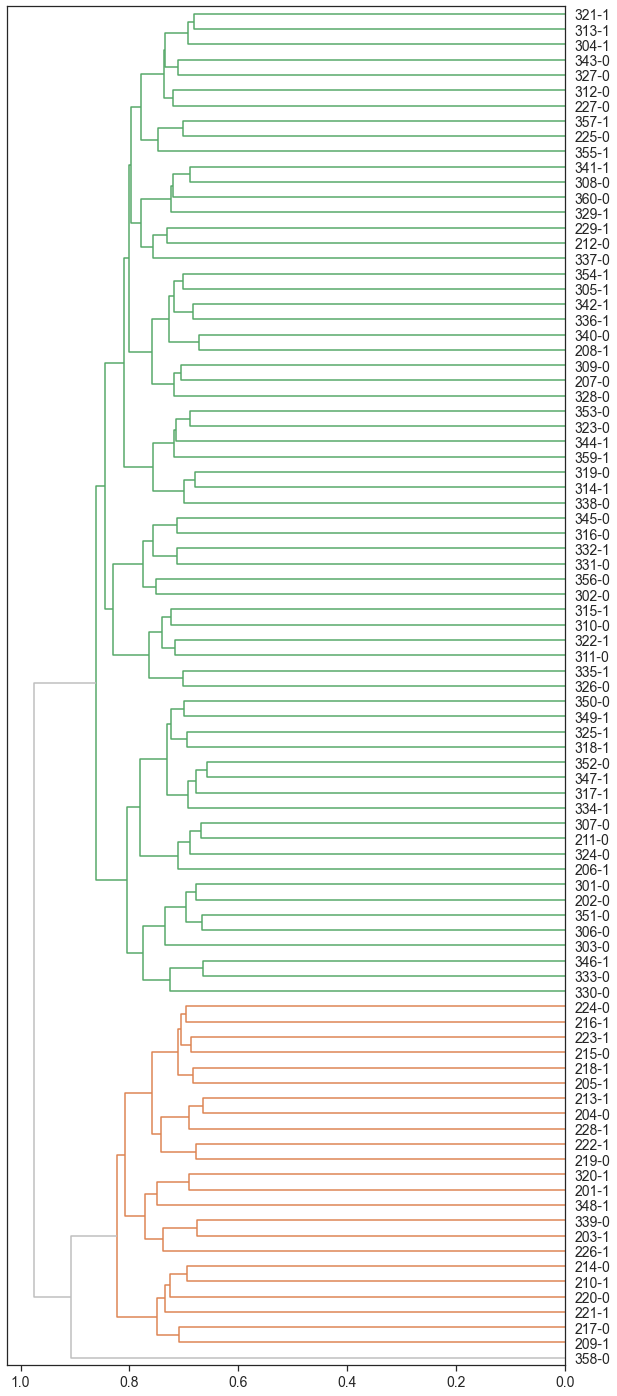

In [83]:
hca(pairs.js2, color_thresh = 0.9)

#### k means

In [84]:
from sklearn.cluster import KMeans

In [85]:
speakers = tfidf[['speaker_id', 'mindfulness', 'label']]
speakers.head()

,speaker_id,mindfulness,label
0,201,1,201-1
1,202,0,202-0
2,203,1,203-1
3,204,0,204-0
4,205,1,205-1


In [86]:
tfidf = tfidf.drop('label', axis = 1).set_index(['speaker_id', 'mindfulness'])

In [87]:
tfidf

,,0,1,2,3,4,5,6,7,8,9,...,1545,1546,1547,1548,1549,1550,1551,1552,1553,holdout
speaker_id,mindfulness,,,,,,,,,,,,,,,,,,,,,
201,1,0.0,0.0,0.0,0.000038,0.0,0.0,0.0,0.000000,0.000293,0.0,...,0.000162,0.0,0.000612,0.002148,0.001936,0.0,0.0,0.0,0.0,0
202,0,0.0,0.0,0.0,0.000029,0.0,0.0,0.0,0.000000,0.000075,0.0,...,0.000109,0.0,0.000374,0.000000,0.000000,0.0,0.0,0.0,0.0,0
203,1,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000000,0.000149,0.0,...,0.000139,0.0,0.000841,0.000000,0.000000,0.0,0.0,0.0,0.0,1
204,0,0.0,0.0,0.0,0.000055,0.0,0.0,0.0,0.000000,0.000283,0.0,...,0.000267,0.0,0.001062,0.000000,0.000000,0.0,0.0,0.0,0.0,0
205,1,0.0,0.0,0.0,0.000043,0.0,0.0,0.0,0.000000,0.000221,0.0,...,0.000224,0.0,0.000663,0.000000,0.000000,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0,0.0,0.0,0.0,0.000048,0.0,0.0,0.0,0.004484,0.000248,0.0,...,0.000170,0.0,0.000466,0.000000,0.002457,0.0,0.0,0.0,0.0,0
357,1,0.0,0.0,0.0,0.000072,0.0,0.0,0.0,0.000000,0.000212,0.0,...,0.000104,0.0,0.000133,0.002330,0.000000,0.0,0.0,0.0,0.0,0
358,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0


In [88]:
n_clusters = 4

In [89]:
speakers['y_raw'] = KMeans(n_clusters).fit_predict(tfidf)
speakers['y_L0'] = KMeans(n_clusters).fit_predict(l0)
speakers['y_L1'] = KMeans(n_clusters).fit_predict(l1)
speakers['y_L2'] = KMeans(n_clusters).fit_predict(l2)

In [90]:
speakers.head()

,speaker_id,mindfulness,label,y_raw,y_L0,y_L1,y_L2
0,201,1,201-1,1,1,2,2
1,202,0,202-0,1,1,2,2
2,203,1,203-1,0,1,2,2
3,204,0,204-0,1,1,2,2
4,205,1,205-1,1,1,2,2


In [91]:
speakers.to_csv('output files/k_means.csv')

In [92]:
speakers.sort_values('y_raw').style.background_gradient(cmap = 'viridis')

,speaker_id,mindfulness,label,y_raw,y_L0,y_L1,y_L2
88,360,0,360-0,0,2,2,1
45,317,1,317-1,0,2,2,2
43,315,1,315-1,0,3,2,0
53,325,1,325-1,0,2,2,2
41,313,1,313-1,0,1,2,0
56,328,0,328-0,0,2,2,3
33,305,1,305-1,0,2,2,1
63,335,1,335-1,0,2,3,3
30,302,0,302-0,0,3,2,1
66,338,0,338-0,0,1,2,1


In [93]:
speakers.sort_values('y_L0').style.background_gradient(cmap = 'viridis')

,speaker_id,mindfulness,label,y_raw,y_L0,y_L1,y_L2
47,319,0,319-0,1,0,0,0
42,314,1,314-1,1,0,2,0
74,346,1,346-1,1,0,2,0
0,201,1,201-1,1,1,2,2
79,351,0,351-0,1,1,2,1
58,330,0,330-0,1,1,2,0
78,350,0,350-0,0,1,2,1
29,301,0,301-0,1,1,2,1
31,303,0,303-0,1,1,2,1
75,347,1,347-1,1,1,2,0


In [94]:
speakers.sort_values('y_L1').style.background_gradient(cmap = 'viridis')

,speaker_id,mindfulness,label,y_raw,y_L0,y_L1,y_L2
47,319,0,319-0,1,0,0,0
69,341,1,341-1,1,1,0,1
5,206,1,206-1,1,1,0,3
35,307,0,307-0,1,1,0,2
10,211,0,211-0,1,1,0,2
86,358,0,358-0,2,3,1,2
0,201,1,201-1,1,1,2,2
62,334,1,334-1,1,1,2,1
61,333,0,333-0,1,1,2,0
60,332,1,332-1,1,2,2,1


In [95]:
speakers.sort_values('y_L2').style.background_gradient(cmap = 'viridis')

,speaker_id,mindfulness,label,y_raw,y_L0,y_L1,y_L2
44,316,0,316-0,1,2,2,0
42,314,1,314-1,1,0,2,0
43,315,1,315-1,0,3,2,0
36,308,0,308-0,1,2,2,0
47,319,0,319-0,1,0,0,0
52,324,0,324-0,1,2,2,0
57,329,1,329-1,1,2,2,0
58,330,0,330-0,1,1,2,0
59,331,0,331-0,1,3,2,0
61,333,0,333-0,1,1,2,0
